from param_analysis import ParameterAnalysis
from plots import *

In [1]:
from param_analysis import ParameterAnalysis
from plots import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#connectedness_values = [0.2,0.5,0.8]
#ecb_precision_gammas = [2.2,2.4,2.6,2.8,3]
#ecb_precision_gammas = [2.6,2.8,3,3.2,3.4,3.6,3.8,4,5,6,7,8,9]

connectedness_values = [0.2,0.3,0.4,0.5,0.6,0.7]
#ecb_precision_gammas = [2.2,2.4,2.6,2.8,3]
ecb_precision_gammas = [2.6,2.8,3,3.2,3.4,3.6,3.8,4,5,6,7,8,9]


#num_agent_values = [3,5,8]
#num_agent_values = [5]
num_agent_values = [15]

n = len(num_agent_values)
c = len(connectedness_values)
env_precision_gammas = [9]
b_precision_gammas = [7]
lr = [0.3]
#lr = [0.001,0.01,0.1,0.3,0.5,0.7,0.9,1.2,1.4,1.6,1.8,2.0,2.2,2.5,3,4,5]

#variances = [0.01, 0.1, 0.5, 0.8, 1.1, 1.5, 2]
variances = [0.1]
r_len = len(ecb_precision_gammas)
e_len = len(env_precision_gammas)
b_len = len(b_precision_gammas)
v_len = len(variances)
lr_len = len(lr)
n_trials = 50

In [4]:
params = ParameterAnalysis('','', num_agent_values, connectedness_values, ecb_precision_gammas, env_precision_gammas, b_precision_gammas, lr, variances, n_trials)

In [5]:
params.n_trials

50

In [6]:
data = params.load_results("results/ecb_results_structure_2")

Initial Large Sweep over Parameter Space - Analyzing the clustering metrics 

In [7]:
params.get_overall_metrics(from_files = True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/daphnedemekas/Desktop/Imperial/Thesis/active_inference_opinion_dynamics/Analysis/param_analysis.py:146: RuntimeWarning: Mean of empty slice
  self.db_indices[i] = np.nanmean(np.array([cm.davies_bouldin(self.all_qs[j,:,:,:]) for j in range(self.n_trials)]))
/Users/daphnedemekas/Desktop/Imperial/Thesis/active_inference_opinion_dynamics/Analysis/param_analysis.py:149: RuntimeWarning: Mean of empty slice
 

In [8]:
params.param_idx

76

New Sweep

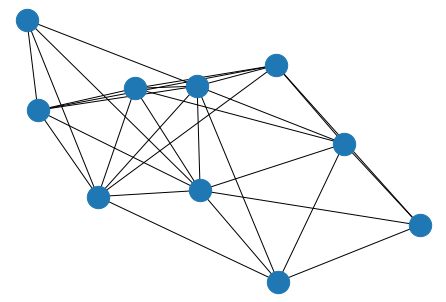

In [9]:
params.adj_mat[0]
import networkx as nx

def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500)
    plt.show()

show_graph_with_labels(params.adj_mat[0])
#make a gif that colors this network with the beliefs of the agents over time

In [10]:
all_parameters = np.array(list(params.get_param_combinations()))

In [11]:

def get_indices_by_criteria(params):
    criteria_indices = {}
    consensus_indices = np.where(np.isnan(params.insider_outsider_ratios[:,-1]))[0]
    consensus_ratios = params.insider_outsider_ratios[consensus_indices]
    consensus_params = all_parameters[consensus_indices]
    criteria_indices["consensus"] = [consensus_indices, consensus_ratios, consensus_params]
    clustering_indices = np.where(~np.isnan(params.insider_outsider_ratios[:,-1]))[0]
    clustering_params = all_parameters[clustering_indices]
    clustering_ratios = params.insider_outsider_ratios[clustering_indices]
    criteria_indices["clustering"] = [clustering_indices, clustering_ratios, clustering_params]

    return criteria_indices


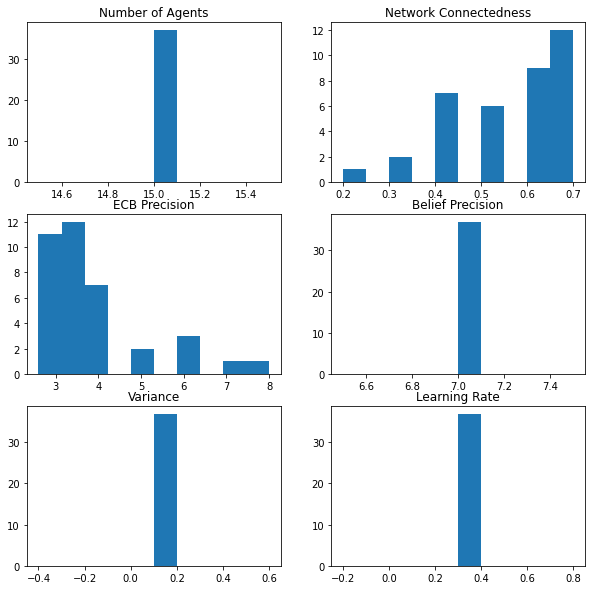

In [12]:
criteria_indices = get_indices_by_criteria(params)

plot_param_histograms(criteria_indices["consensus"][-1])


# HERE WE SHOW CONNECTEDNESS AND ECB ON CONSENSUS AND CLUSTERING FOR THE FIRST TIME 

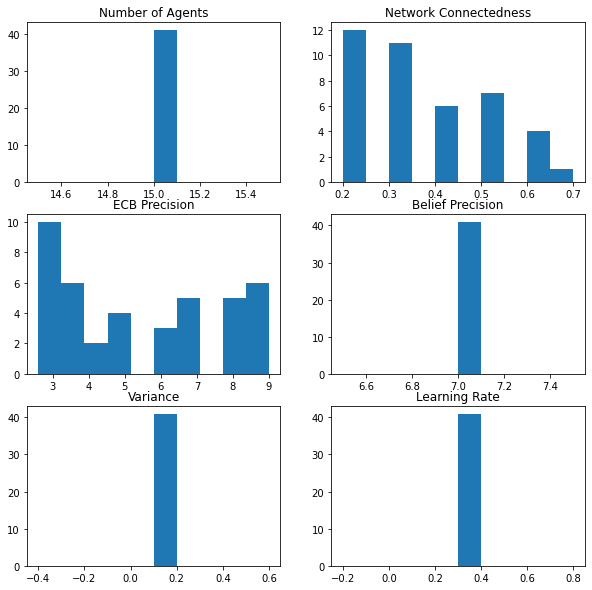

In [20]:
plot_param_histograms(criteria_indices["clustering"][-1])

In [21]:

def plot_bifurcations(all_parameters, ecb_precisions, connectedness_values, metric, metric_name):
    fig, axs = plt.subplots(2, 1, figsize=(12,8))
    belief_extremities1 = isolate_metric_by(all_parameters,metric, ecb_precisions, 2)
    belief_extremities2 = isolate_metric_by(all_parameters,metric, connectedness_values, 1)
    axs[0].plot(ecb_precisions, belief_extremities1)
    axs[0].set_xlabel("ECB Precision")
    axs[0].set_ylabel(metric_name)

    axs[1].plot(connectedness_values, belief_extremities2)
    axs[1].set_xlabel("Network Connectivity")
    axs[1].set_ylabel(metric_name)



Bifurcation Plots - Belief Extremity per ECB Precision

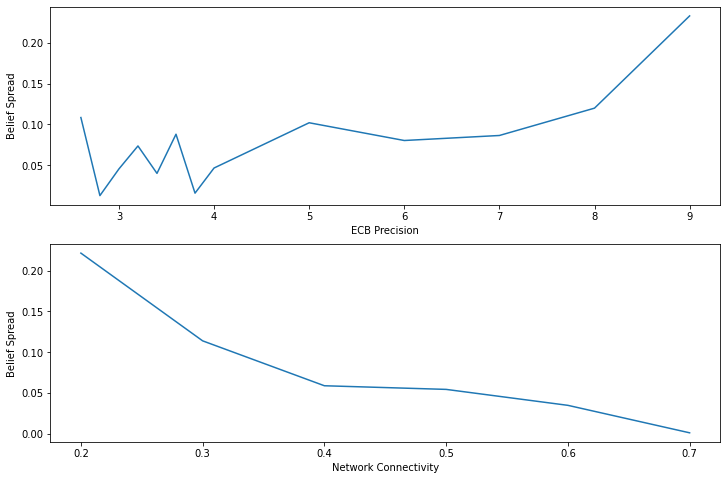

In [22]:
plot_bifurcations(all_parameters,ecb_precision_gammas,connectedness_values, params.avg_belief_diff, "Belief Spread")

([<matplotlib.axis.YTick at 0x7f941a5fb340>,
 [Text(0, 0, '2.6'),
  Text(0, 1, '2.8'),
  Text(0, 2, '3'),
  Text(0, 3, '3.2'),
  Text(0, 4, '3.4'),
  Text(0, 5, '3.6'),
  Text(0, 6, '3.8'),
  Text(0, 7, '4'),
  Text(0, 8, '5'),
  Text(0, 9, '6'),
  Text(0, 10, '7'),
  Text(0, 11, '8')])

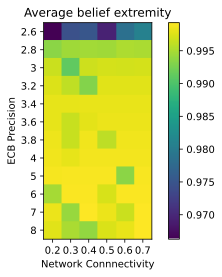

In [16]:
%config InlineBackend.figure_format = 'svg'

fig = plt.figure()
ecb_lr = get_2d_histogram(ecb_precision_gammas[:-1], connectedness_values, all_parameters, params.avg_belief_extremity, 2, 1)
plt.imshow(ecb_lr)
plt.colorbar()
plt.xlabel("Network Connnectivity")
plt.ylabel("ECB Precision")
plt.title("Average belief extremity")
plt.xticks(np.arange(0,len(connectedness_values),1), labels = connectedness_values)
plt.yticks(np.arange(0,len(ecb_precision_gammas[:-1]),1), labels =ecb_precision_gammas[:-1])


/Users/daphnedemekas/Desktop/Imperial/Thesis/active_inference_opinion_dynamics/Analysis/plots.py:221: RuntimeWarning: Mean of empty slice
  avg_metric = np.nanmean(p2_metrics[np.isfinite(p2_metrics)])


([<matplotlib.axis.YTick at 0x7f892a0bbd60>,
 [Text(0, 0, '2.6'),
  Text(0, 1, '2.8'),
  Text(0, 2, '3'),
  Text(0, 3, '3.2'),
  Text(0, 4, '3.4'),
  Text(0, 5, '3.6'),
  Text(0, 6, '3.8'),
  Text(0, 7, '4'),
  Text(0, 8, '5'),
  Text(0, 9, '6'),
  Text(0, 10, '7'),
  Text(0, 11, '8')])

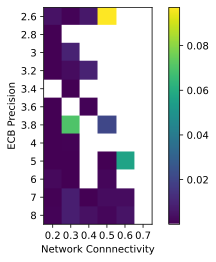

In [25]:
%config InlineBackend.figure_format = 'svg'

fig = plt.figure()
ecb_lr = get_2d_histogram(ecb_precision_gammas[:-1], connectedness_values, all_parameters, params.db_indices, 2, 1)
plt.imshow(ecb_lr)
plt.colorbar()
plt.xlabel("Network Connnectivity")
plt.ylabel("ECB Precision")
#plt.title("Average extremity of beliefs")
plt.xticks(np.arange(0,len(connectedness_values),1), labels = connectedness_values)
plt.yticks(np.arange(0,len(ecb_precision_gammas[:-1]),1), labels =ecb_precision_gammas[:-1])


In [15]:
 params.avg_belief_extremity

array([0.96627231, 0.99359246, 0.996585  , 0.99752046, 0.99812207,
       0.99805054, 0.99851058, 0.99863352, 0.99880478, 0.99483766,
       0.99836514, 0.99779071, 0.99506815, 0.97448643, 0.99457072,
       0.99121514, 0.9961554 , 0.99803736, 0.99652792, 0.99647734,
       0.99801585, 0.99894063, 0.99912359, 0.99424456, 0.99505319,
       0.99488641, 0.9751259 , 0.99465464, 0.9967397 , 0.99310608,
       0.9981424 , 0.99793167, 0.99853004, 0.99865191, 0.99900172,
       0.99913417, 0.99922338, 0.99387245, 0.99328782, 0.96940651,
       0.99463143, 0.99714326, 0.99777854, 0.99815033, 0.99836724,
       0.99599719, 0.9986514 , 0.99899255, 0.9972812 , 0.99830435,
       0.99736043, 0.99502625, 0.97848922, 0.99519971, 0.99709312,
       0.99782963, 0.99814357, 0.99836725, 0.99853837, 0.99865518,
       0.99358597, 0.99914995, 0.99667289, 0.99815904, 0.99606244,
       0.98078586, 0.99505143, 0.99717425, 0.99781407, 0.99814766,
       0.99837338, 0.9985319 , 0.99866184, 0.99900556, 0.99915

In [18]:
params.connectedness_values

[0.2, 0.5, 0.8]

In [16]:
def plot_heatmaps(metric, ecb_precision_gammas, b_precision_gammas, learning_rates, variance,all_parameters):
    fig, axs = plt.subplots(3, 3, figsize=(12,8))
    ecb_lr = get_2d_histogram(ecb_precision_gammas, lr, all_parameters, metric, 2, -1)
    plot_2d_histogram(axs[0,0], ecb_lr, "Learning Rate", "ECB Precisions", ecb_precision_gammas, lr)

    ecb_b = get_2d_histogram(ecb_precision_gammas, b_precision_gammas, all_parameters, metric, 2, 3)
    plot_2d_histogram(axs[0,1], ecb_b, "Belief Determinism", "ECB Precisions", ecb_precision_gammas, b_precision_gammas)

    ecb_v = get_2d_histogram(ecb_precision_gammas, variance, all_parameters, metric, 2, -2)
    plot_2d_histogram(axs[1,0], ecb_v, "Variance", "ECB Precision", ecb_precision_gammas, variance)

    ecb_c = get_2d_histogram(ecb_precision_gammas, connectedness_values, all_parameters, metric, 2, 1)
    plot_2d_histogram(axs[1,1], ecb_c, "Network Connectivity", "ECB Precision", ecb_precision_gammas, connectedness_values)

    ecb_c = get_2d_histogram(lr, b_precision_gammas, all_parameters, metric, -1,3 )
    plot_2d_histogram(axs[1,1], ecb_c, "Network Connectivity", "ECB Precision", ecb_precision_gammas, connectedness_values)



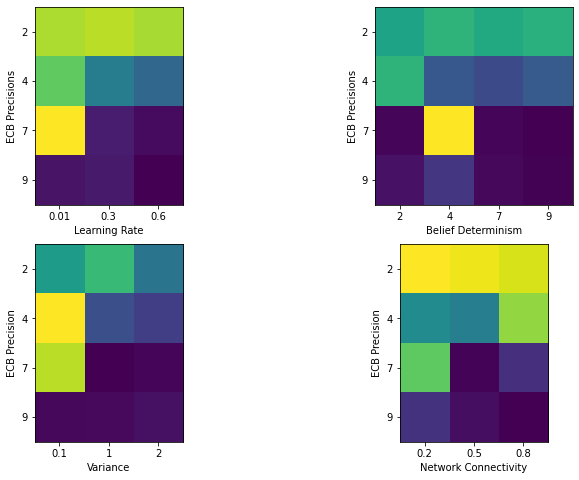

In [118]:
plot_heatmaps(params.db_indices, ecb_precision_gammas, b_precision_gammas, lr, variances,all_parameters)

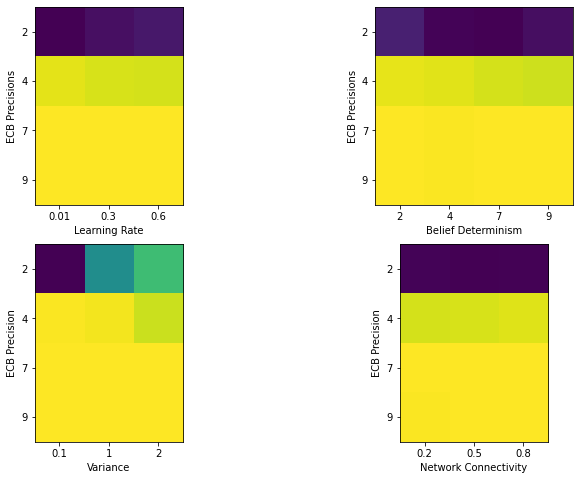

In [119]:
plot_heatmaps(params.avg_belief_extremity, ecb_precision_gammas, b_precision_gammas, lr, variances,all_parameters)

HeatMaps

Text(0.5, 1.0, 'Histogram for Outsider to Insider Sampling Ratio ')

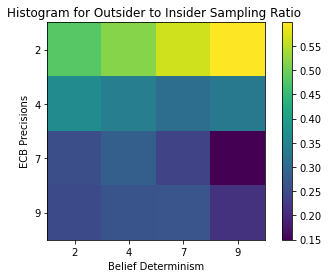

In [90]:
ecb_b_db_clustering_hist = get_2d_histogram(ecb_precision_gammas, b_precision_gammas, all_parameters, params.insider_outsider_ratios, 2, 3)
plot_2d_histogram(ecb_b_db_clustering_hist, "Belief Determinism", "ECB Precisions", ecb_precision_gammas, b_precision_gammas)
plt.title("Histogram for Outsider to Insider Sampling Ratio ")

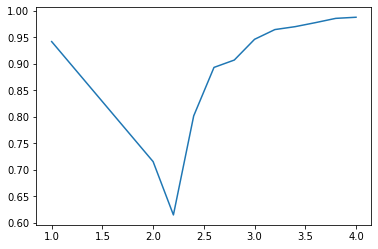

In [300]:
plt.plot(ecb_precision_gammas, belief_extremities)

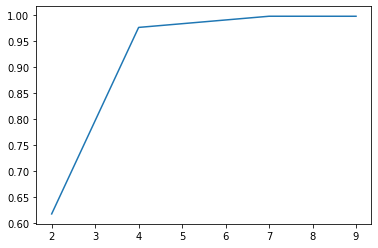

In [267]:
plt.plot(ecb_precision_gammas, belief_extremities)

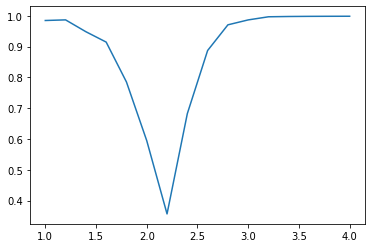

In [251]:
plt.plot(ecb_precision_gammas, belief_extremities)

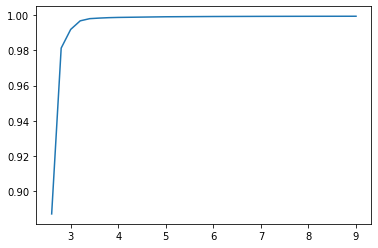

In [236]:
plt.plot(ecb_precision_gammas, belief_extremities)

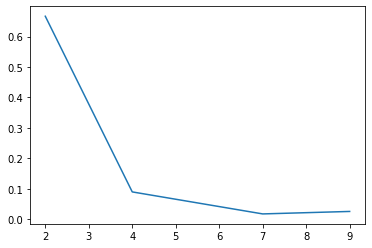

In [268]:
plt.plot(ecb_precision_gammas, belief_diffs)

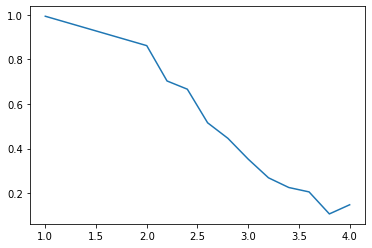

In [301]:
plt.plot(ecb_precision_gammas, belief_diffs)

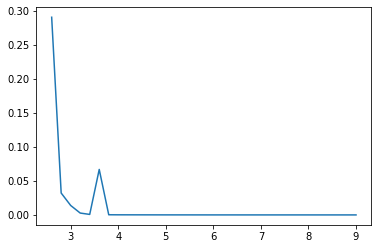

In [237]:
plt.plot(ecb_precision_gammas, belief_diffs)

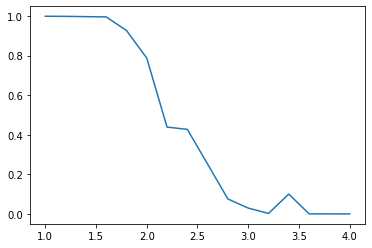

In [252]:
plt.plot(ecb_precision_gammas, belief_diffs)

Text(0.5, 1.0, 'Histogram for Belief Extremity ')

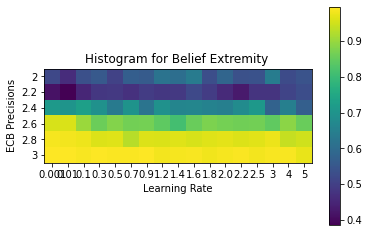

In [63]:
ecb_b_db_clustering_hist = get_2d_histogram(ecb_precision_gammas, lr, all_parameters, avg_belief_extremity, 2, -1)
plot_2d_histogram(ecb_b_db_clustering_hist, "Learning Rate", "ECB Precisions", ecb_precision_gammas, lr)
plt.title("Histogram for Belief Extremity ")

Text(0.5, 1.0, 'Histogram for Belief Difference ')

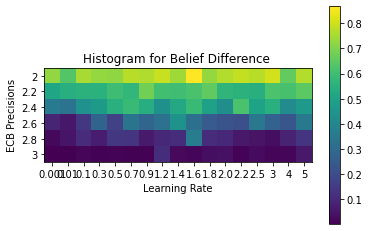

In [64]:
ecb_b_db_clustering_hist = get_2d_histogram(ecb_precision_gammas, lr, all_parameters, avg_belief_diff, 2, -1)
plot_2d_histogram(ecb_b_db_clustering_hist, "Learning Rate", "ECB Precisions", ecb_precision_gammas, lr)
plt.title("Histogram for Belief Difference ")

/Users/daphnedemekas/Desktop/Imperial/Thesis/active_inference_opinion_dynamics/Analysis/plots.py:144: RuntimeWarning: Mean of empty slice
  avg_metric = np.nanmean(p2_metrics[np.isfinite(p2_metrics)])


Text(0.5, 1.0, 'Histogram for Outsider to Insider Sampling Ratio ')

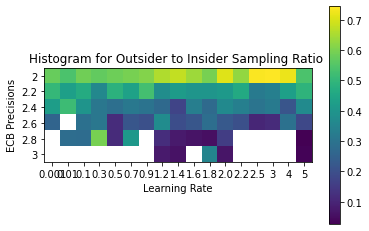

In [65]:
ecb_b_db_clustering_hist = get_2d_histogram(ecb_precision_gammas, lr, all_parameters, params.insider_outsider_ratios, 2, -1)
plot_2d_histogram(ecb_b_db_clustering_hist, "Learning Rate", "ECB Precisions", ecb_precision_gammas, lr)
plt.title("Histogram for Outsider to Insider Sampling Ratio ")

[[0.99848652 0.998685   0.96547862 0.93562544 0.91702337 0.90475721
  0.87273809]
 [0.66938765 0.55581966 0.57386324 0.72094816 0.77827614 0.81459687
  0.89654965]
 [0.21739265 0.24511901 0.5996746  0.74110198 0.7589304  0.89172863
  0.85253773]
 [0.86869629 0.82978515 0.65975101 0.71343511 0.80393041 0.87595634
  0.86125467]
 [0.98217562 0.97719367 0.83998921 0.82705049 0.82800772 0.88103327
  0.9167787 ]
 [0.99500312 0.99425337 0.92481935 0.84315377 0.85327432 0.82816284
  0.91057218]
 [0.99716868 0.99707299 0.96075735 0.94017955 0.90217599 0.91711712
  0.9085306 ]
 [0.99779241 0.99779483 0.99395118 0.97638419 0.95108127 0.90384115
  0.93040578]
 [0.99813644 0.99810397 0.98922859 0.98331505 0.95167118 0.96232929
  0.9070289 ]
 [0.99836176 0.99835545 0.99457016 0.99466613 0.97481578 0.94917605
  0.93285112]
 [0.99852419 0.998511   0.99839625 0.9963498  0.99020748 0.95092479
  0.96618186]
 [0.99864704 0.99864398 0.99855217 0.99084955 0.99272806 0.96126527
  0.97323465]]


Text(0.5, 1.0, 'Histogram for Belief Extremity ')

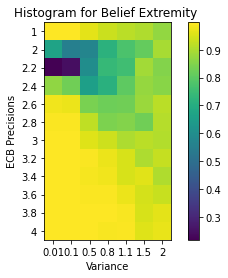

In [302]:
ecb_b_db_clustering_hist = get_2d_histogram(ecb_precision_gammas, variances, all_parameters, avg_belief_extremity, 2, -2)
plot_2d_histogram(ecb_b_db_clustering_hist, "Variance", "ECB Precisions", ecb_precision_gammas, variances)
plt.title("Histogram for Belief Extremity ")

In [202]:
#other interesting measures of clustering is the nonzero KL divergences, and db indices which are not 1 
#np.mean(params.db_indices[non_zero_kls])

The majority of existing empirical studies suggest that the formation of continuous
opinions (presented as continuous quantities) largely follow the linear positive
mechanism whereby individuals tend to modify their opinions toward those of their
friends with a magnitude proportional to the pre-existing difference in opinions (Friedkin
et al., 2021; Takács et al., 2016). However, some papers suggest a moderated positive
influence: there is a maximum rate of influence if the difference is not too small and not
too high; otherwise, it decreases (Moussaïd et al., 2013). Studies that reported a negative
influence (opinion shifts away from the opinions of peers) either have methodological
concerns (Knippenberg et al., 1990; Mazen & Leventhal, 1972) or are based on natural
experiments in which researchers are unable to control for all possible confounding
factors (Liu & Srivastava, 2015).

In [ ]:
def is_connected(adj_mat):
    return np.where(adj_mat == 1)

def get_agent_data(agent, result, cluster1, cluster2):
    agent_adj_mat = result['adj_mat'][:,agent,:]
    agent_beliefs = result['all_qs'][:,:,:,agent]
    agent_samplings = result['all_neighbour_sampling'][:,:,agent]
    agent_tweets = result['all_tweets'][:,:,agent]
    agent_cluster = cluster1[0] if agent in cluster1[0] else cluster2[0]
    other_cluster = cluster1[0] if agent not in cluster1[0] else cluster2[0]
    neighbours = list(is_connected(agent_adj_mat[0])[0])
    outsider_neighbours = np.intersect1d(neighbours, other_cluster)
    insider_neighbours = np.intersect1d(neighbours, agent_cluster)
    
    return agent_adj_mat, agent_beliefs, agent_samplings, agent_tweets, agent_cluster, other_cluster, neighbours, outsider_neighbours, insider_neighbours

[15.   0.2  2.6  7.   9.   0.1  0.3]


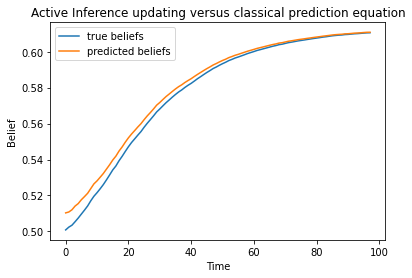

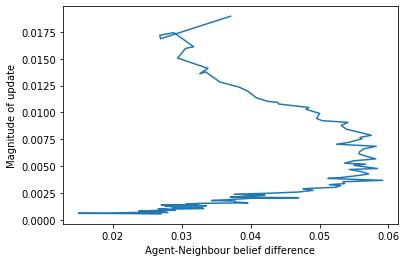

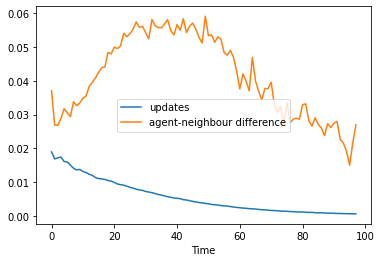

[15.   0.2  2.8  7.   9.   0.1  0.3]


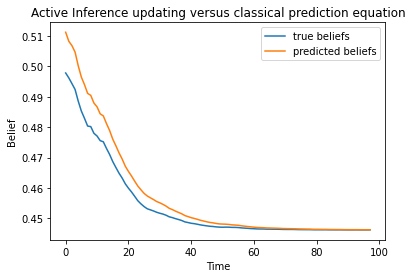

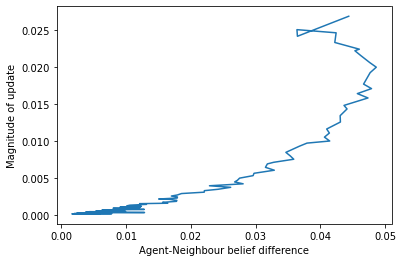

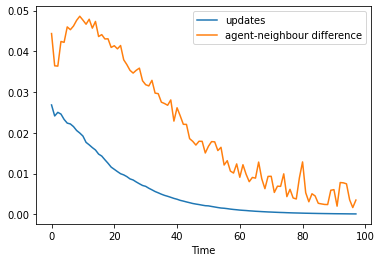

[15.   0.2  3.   7.   9.   0.1  0.3]


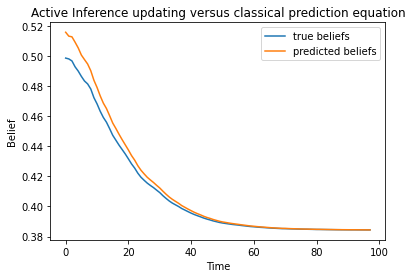

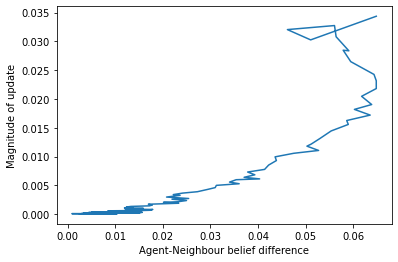

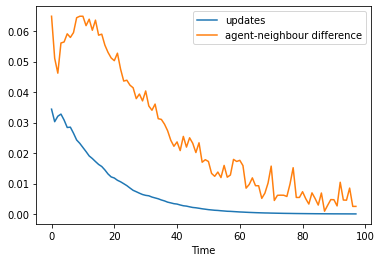

[15.   0.2  3.2  7.   9.   0.1  0.3]


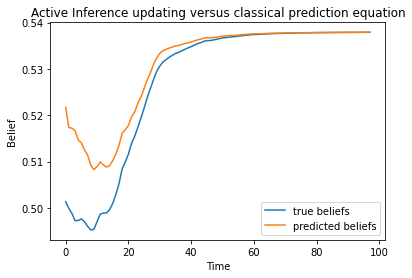

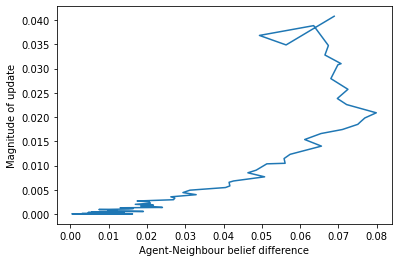

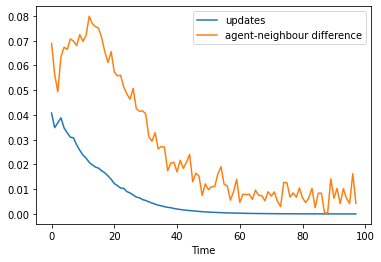

[15.   0.2  3.6  7.   9.   0.1  0.3]


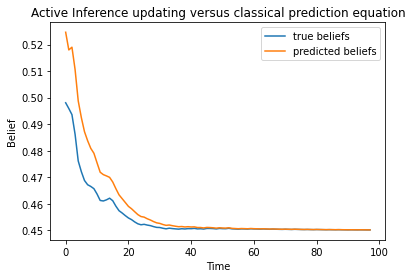

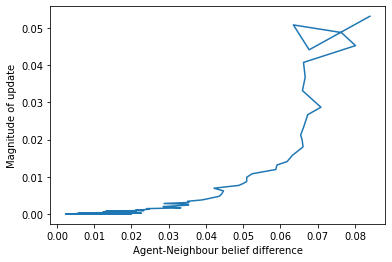

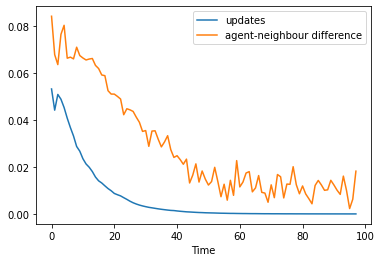

In [41]:
clustering_params = criteria_indices["clustering"][2]
for p in clustering_params[0:5]:
    params.update_params(p)
    params.get_sim_results_from_files()
    all_pos_updates = []
    all_pos_diffs = []
    all_bel = []
    #all_neg_updates = []
    #all_neg_diffs = []
    all_predicted = []
    for trial in range(50):

        all_beliefs_t = params.all_qs[trial]

        cluster1 = np.where(all_beliefs_t[-1,1,:] > 0.5)
        cluster2 = np.where(all_beliefs_t[-1,1,:] < 0.5)
        result = params.get_sim_results_from_files()

        for age in range(result['all_qs'].shape[-1]):
            diffs = []
            updates = []
            predicted = []
            bel = []
            #n_diffs = []
           # n_updates = []
            agent_adj_mat, agent_beliefs, agent_samplings, agent_tweets, agent_cluster, other_cluster, neighbours, outsider_neighbours, insider_neighbours = get_agent_data(age,result,cluster1,cluster2)
            agent_reads = [result['all_tweets'][trial,t,int(a)] for t,a in enumerate(agent_samplings[trial,:])]
            agent_n_beliefs = [result['all_qs'][trial,t,0,int(a)] for t, a in enumerate(agent_samplings[trial,:-1])]
            behaviour = [( agent_tweets[trial][t], agent_reads[t], agent_beliefs[trial,:,0][t], agent_n_beliefs[t], (agent_beliefs[trial,:,0][t] - agent_beliefs[trial,:,0][t-1] )) for t in range(1,len(agent_reads)-1)]
            for i, step in enumerate(behaviour[:-1]):
                diff = np.absolute(step[2] - step[3])
                updt = np.absolute(behaviour[i+1][2] - step[2])
                bel.append(step[2])
                predicted.append(step[2] + 0.5 * updt)
                #if step[-1] > 0:
                diffs.append(diff)
                updates.append(updt)
                #n_diffs.append(np.nan)
                #n_updates.append(np.nan)
                   # diffs.append(np.nan)
                   # updates.append(np.nan)
                   # n_diffs.append(diff)
                   # n_updates.append(updt)
            all_pos_updates.append(updates)
            all_pos_diffs.append(diffs)
            all_predicted.append(predicted)
            all_bel.append(bel)
            #plt.plot(range(98), bel )
            #plt.plot(range(98), predicted)
            #plt.show()
            #raise
            #all_neg_updates.append(n_updates)
            #all_neg_diffs.append(n_diffs) 
    print(p)
    plt.plot(range(98), np.nanmean(np.array(all_bel), axis = 0), label = "true beliefs")
    plt.plot(range(98), np.nanmean(np.array(all_predicted), axis = 0), label = "predicted beliefs")
    plt.xlabel("Time")
    plt.ylabel("Belief")
    plt.title("Active Inference updating versus classical prediction equation")
    plt.legend()
    plt.show()
    plt.xlabel("Agent-Neighbour belief difference")
    plt.ylabel("Magnitude of update")
    plt.plot(np.nanmean(np.array(all_pos_diffs), axis = 0), np.nanmean(np.array(all_pos_updates),axis= 0),)
    #plt.plot(np.nanmean(np.array(all_neg_diffs), axis = 0), np.nanmean(np.array(all_neg_updates),axis= 0),color = 'red')
    plt.show()
    plt.xlabel("Time")
    plt.plot(range(98), np.nanmean(np.array(all_pos_updates),axis= 0), label = "updates")
    plt.plot(range(98), np.nanmean(np.array(all_pos_diffs),axis=0), label = "agent-neighbour difference")
    plt.legend()

    plt.show()


[15.   0.2  3.4  7.   9.   0.1  0.3]


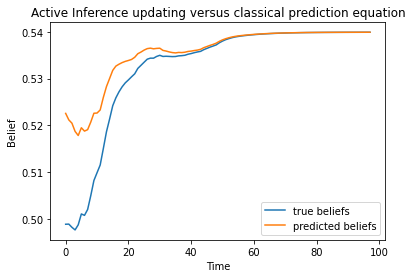

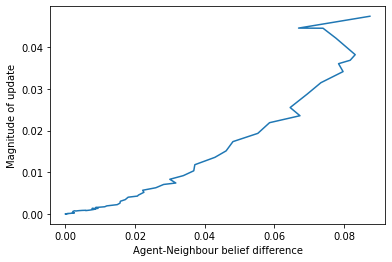

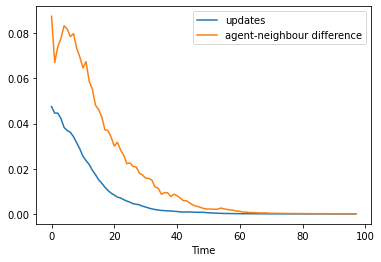

[15.   0.3  2.8  7.   9.   0.1  0.3]


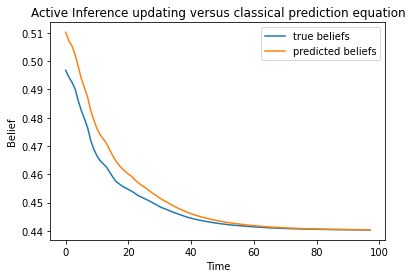

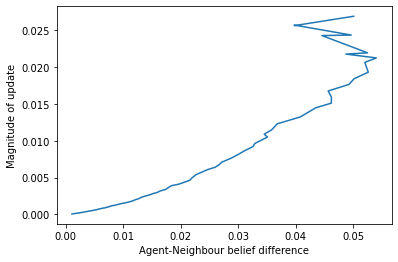

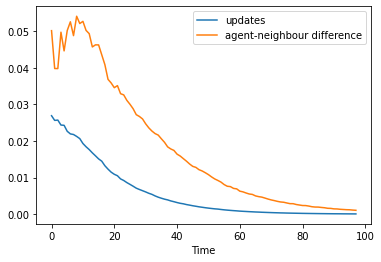

[15.   0.3  3.6  7.   9.   0.1  0.3]


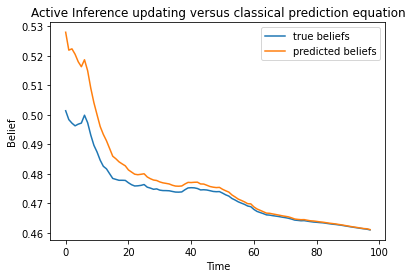

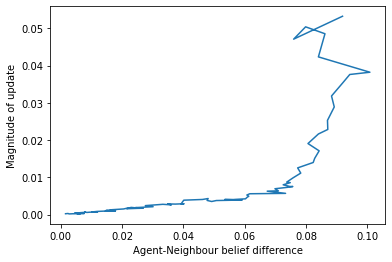

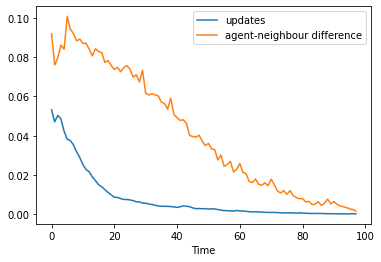

[15.   0.4  2.8  7.   9.   0.1  0.3]


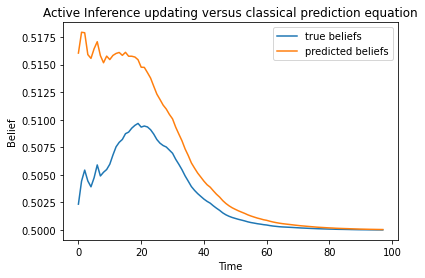

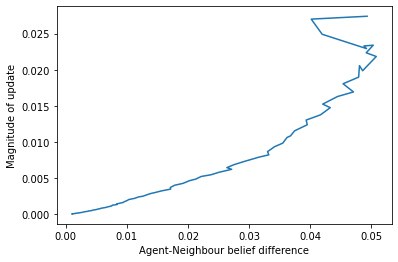

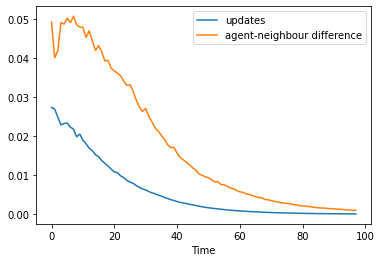

[15.   0.4  3.   7.   9.   0.1  0.3]


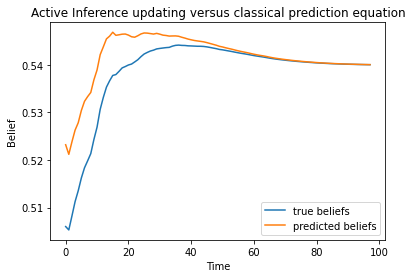

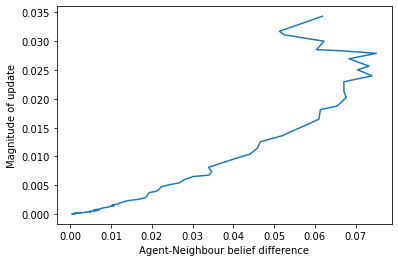

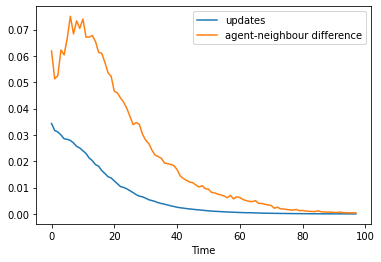

In [44]:
clustering_params = criteria_indices["consensus"][2]
for p in clustering_params[0:5]:
    params.update_params(p)
    params.get_sim_results_from_files()
    all_pos_updates = []
    all_pos_diffs = []
    all_bel = []
    #all_neg_updates = []
    #all_neg_diffs = []
    all_predicted = []
    for trial in range(50):

        all_beliefs_t = params.all_qs[trial]

        cluster1 = np.where(all_beliefs_t[-1,1,:] > 0.5)
        cluster2 = np.where(all_beliefs_t[-1,1,:] < 0.5)
        result = params.get_sim_results_from_files()

        for age in range(result['all_qs'].shape[-1]):
            diffs = []
            updates = []
            predicted = []
            bel = []
            #n_diffs = []
           # n_updates = []
            agent_adj_mat, agent_beliefs, agent_samplings, agent_tweets, agent_cluster, other_cluster, neighbours, outsider_neighbours, insider_neighbours = get_agent_data(age,result,cluster1,cluster2)
            agent_reads = [result['all_tweets'][trial,t,int(a)] for t,a in enumerate(agent_samplings[trial,:])]
            agent_n_beliefs = [result['all_qs'][trial,t,0,int(a)] for t, a in enumerate(agent_samplings[trial,:-1])]
            behaviour = [( agent_tweets[trial][t], agent_reads[t], agent_beliefs[trial,:,0][t], agent_n_beliefs[t], (agent_beliefs[trial,:,0][t] - agent_beliefs[trial,:,0][t-1] )) for t in range(1,len(agent_reads)-1)]
            for i, step in enumerate(behaviour[:-1]):
                diff = np.absolute(step[2] - step[3])
                updt = np.absolute(behaviour[i+1][2] - step[2])
                bel.append(step[2])
                predicted.append(step[2] + 0.5 * updt)
                #if step[-1] > 0:
                diffs.append(diff)
                updates.append(updt)
                #n_diffs.append(np.nan)
                #n_updates.append(np.nan)
                   # diffs.append(np.nan)
                   # updates.append(np.nan)
                   # n_diffs.append(diff)
                   # n_updates.append(updt)
            all_pos_updates.append(updates)
            all_pos_diffs.append(diffs)
            all_predicted.append(predicted)
            all_bel.append(bel)
            #plt.plot(range(98), bel )
            #plt.plot(range(98), predicted)
            #plt.show()
            #raise
            #all_neg_updates.append(n_updates)
            #all_neg_diffs.append(n_diffs) 
    print(p)
    plt.plot(range(98), np.nanmean(np.array(all_bel), axis = 0), label = "true beliefs")
    plt.plot(range(98), np.nanmean(np.array(all_predicted), axis = 0), label = "predicted beliefs")
    plt.xlabel("Time")
    plt.ylabel("Belief")
    plt.title("Active Inference updating versus classical prediction equation")
    plt.legend()
    plt.show()
    plt.xlabel("Agent-Neighbour belief difference")
    plt.ylabel("Magnitude of update")
    plt.plot(np.nanmean(np.array(all_pos_diffs), axis = 0), np.nanmean(np.array(all_pos_updates),axis= 0),)
    #plt.plot(np.nanmean(np.array(all_neg_diffs), axis = 0), np.nanmean(np.array(all_neg_updates),axis= 0),color = 'red')
    plt.show()
    plt.xlabel("Time")
    plt.plot(range(98), np.nanmean(np.array(all_pos_updates),axis= 0), label = "updates")
    plt.plot(range(98), np.nanmean(np.array(all_pos_diffs),axis=0), label = "agent-neighbour difference")
    plt.legend()

    plt.show()
   

In [ ]:
 
for p in clustering_params:
    params.update_params(p)
    params.get_sim_results_from_files()
    all_pos_updates = []
    all_pos_diffs = []
    all_neg_updates = []
    all_neg_diffs = []
    for trial in range(50):

        all_beliefs_t = params.all_qs[trial]

        cluster1 = np.where(all_beliefs_t[-1,1,:] > 0.5)
        cluster2 = np.where(all_beliefs_t[-1,1,:] < 0.5)
        result = params.get_sim_results_from_files()

        for age in range(result['all_qs'].shape[-1]):
            diffs = []
            updates = []
            n_diffs = []
            n_updates = []
            agent_adj_mat, agent_beliefs, agent_samplings, agent_tweets, agent_cluster, other_cluster, neighbours, outsider_neighbours, insider_neighbours = get_agent_data(age,result,cluster1,cluster2)
            agent_reads = [result['all_tweets'][trial,t,int(a)] for t,a in enumerate(agent_samplings[trial,:])]
            agent_n_beliefs = [result['all_qs'][trial,t,0,int(a)] for t, a in enumerate(agent_samplings[trial,:-1])]
            behaviour = [( agent_tweets[trial][t], agent_reads[t], agent_beliefs[trial,:,0][t], agent_n_beliefs[t], (agent_beliefs[trial,:,0][t] - agent_beliefs[trial,:,0][t-1] )) for t in range(1,len(agent_reads)-1)]
            for i, step in enumerate(behaviour[:-1]):
                #print(step)
                diff = np.absolute(step[2] - step[3])
                updt = np.absolute(behaviour[i+1][2] - step[2])
                if agent_samplings[trial,i] in insider_neighbours:
                    diffs.append(diff)
                    updates.append(updt)
                    n_diffs.append(np.nan)
                    n_updates.append(np.nan)
                else:
                    diffs.append(np.nan)
                    updates.append(np.nan)
                    n_diffs.append(diff)
                    n_updates.append(updt)
            all_pos_updates.append(updates)
            all_pos_diffs.append(diffs)
            all_neg_updates.append(n_updates)
            all_neg_diffs.append(n_diffs) 
    print(p)
    plt.plot(np.nanmean(np.array(all_pos_diffs), axis = 0), np.nanmean(np.array(all_pos_updates),axis= 0),)
    plt.plot(np.nanmean(np.array(all_neg_diffs), axis = 0), np.nanmean(np.array(all_neg_updates),axis= 0),color = 'red')
    plt.show()
            